In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import dotenv
import sqlalchemy

In [4]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("datasets/seaborn_datasets/titanic.csv")
df

### -Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?

In [ ]:
df["deck"].sort_values().unique()

In [ ]:
# C'erano 7 ponti in teoria. Va considerato che la maggior parte dei dati presenti in quella colonna è nullo

In [ ]:
# Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)

In [ ]:
# Impostiamo dimensione del grafico (larghezza, altezza)
plt.figure(figsize=(5,3))

# Countplot: conta quante occorrenze ci sono per ogni valore unico della colonna 'Country'
sns.countplot(data=df, x="class")
plt.xticks(rotation=45)  # Ruotiamo le etichette sull'asse X di 45° per leggibilità
plt.title("Distribuzione i classi")  # Aggiungiamo un titolo
plt.show()  # Mostriamo il grafico

### - Fare la stessa cosa per la colonna Survived

In [ ]:
# cambio i valori all'interno della colonna 'survived' ai fine di una maggiore leggibilità del grafico
df["survived"] = df["survived"].map({0: "not survived", 1: "survived"})

In [ ]:
plt.figure(figsize=(5,3)) #imposto la grandezza del grafico

# Countplot: conta quante occorrenze ci sono per ogni valore unico della colonna 'Country'
sns.countplot(data=df, x="survived")
plt.title("Sopravvissuti per classe")  # Aggiungiamo un titolo
plt.xlabel('Servived')
plt.ylabel('Passengers')
plt.show()  # Mostriamo il grafico

### - Qual era la distribuzione delle tariffe (Fare)?

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(data=df, x="class", y="fare", estimator="mean") #barplot è il grafico che calcola le medie
plt.xticks(rotation=45)
plt.title("Tariffa media per classe")
plt.xlabel("Classe")
plt.ylabel("Tariffa media")
plt.tight_layout()

### - Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?

In [ ]:
plt.figure(figsize=(5,5)) # Imposta dimensioni del grafico

# Boxplot: visualizza la distribuzione statistica dell'età dei passegeri per classe di imbarco
sns.boxplot(data=df, x="class", y="age", color="red")
plt.xticks(rotation=45)  # Ruota le etichette sull'asse X
plt.title("Distribuzione età per classe di imbarco")  # Titolo del grafico
plt.show()

### - Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cosa ne deduciamo?

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(data=df, x="survived", y= "fare", color="red")
plt.xticks(rotation=45)
plt.title("Distribuzione della tariffa per sopravissuti") 

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(data=df, x="survived", y= "fare", color="red")
plt.show()

In [ ]:
#da questa nalisi deduco che chi è sopravvissuto mediamente ha pagato una tariffa più alta

In [ ]:
#importo il file

In [ ]:
path = "https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/stockdata.csv"
df = pd.read_csv(path)
df

### - Visualizziamo l'andamento delle azioni della Apple ("AAPL")

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Andamento Apple")
df["AAPL"].plot(color="red")

### - Visualizziamo l'andamento di tutte le azioni del dataset

In [ ]:
plt.figure(figsize=(10,4))
df.plot()
plt.title("Andamento aziende")
plt.xticks(rotation=45)
plt.show()

### - Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
filtro = (df["Date"].dt.year == 2012) | (df["Date"].dt.year == 2013) # aggiungo un filtro per visualizzare solo le date interessate
micro_ibm_2012_2013 = df[filtro][["MSFT", "IBM", "Date"]] # creo un altro dataframe che contenga solo le aziende e le date interessate

plt.figure(figsize=(10, 5)) # inizializzo la dimensione del grafico

# per far vedere entrambe le aziende in un solo grafico imposto tramite seaborn entrambi i grafici in uno solo
sns.lineplot(data=micro_ibm_2012_2013, x="Date", y="MSFT", label="Microsoft") #grafico Microsoft
sns.lineplot(data=micro_ibm_2012_2013, x="Date", y="IBM", label="IBM") #grafico IBM

#Imposto i parametri del grafico
plt.title("Andamento azioni Microsoft e IBM (2012-2013)") #titolo
plt.xlabel("Data") #titolo asse x
plt.ylabel("Prezzo azioni") #titolo asse y
plt.tight_layout()
plt.show()


### - Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [ ]:
df["MSFT"].plot( kind="hist", title="Valore azioni Microsoft")

### - Importo il file Metal_bands_2017.csv

In [ ]:
df = pd.read_csv("datasets/seaborn_datasets/metal_bands_2017.csv", encoding='unicode_escape')
df

### - Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?

In [ ]:
#Innazitutto ho bisogno di fare una puclizia a monte del dataframe
#L'ogetto dell'analisi sono i  nnu eir dei fan, quindi posso anche eliminare le band che non hanno fans

In [ ]:
df_no0_Fansdf = df[["band_name", "fans"]].drop(df[df["fans"] == 0].index)
df_no0_Fansdf.plot(kind = "hist")

In [ ]:
# deduco la stragrande maggioranza delle band ha un piccolo numero di fan

### - Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine

In [ ]:
#(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)

In [ ]:
filtro = df["style"].str.contains("Thrash","Progressive") #filtro per stype le band (devono contenere le parole Thrash e Progressive
band_thras_progressive = df[filtro].groupby("origin")["fans"].sum()
plt.figure(figsize=(10,15))
plt.tight_layout()
band_thras_progressive.sort_values(ascending=True).plot(kind="barh", title=("Tot dei fan per paese di origine della bend"))


### - Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [ ]:
# il datatype della colonna "formed" era object, quindi prima lo converto in datatype
df["formed"] = pd.to_datetime(df["formed"], errors="coerce", format="mixed")

In [ ]:
df["formed"] = df["formed"].dt.year #prendo solo l'anno 

In [ ]:
df["formed"] = df["formed"].astype("Int64") #trasformo l'anno in un numero intero

In [ ]:
plt.figure(figsize=(20,4))
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylabel("Band")
plt.xlabel("Anno")
plt.title("Numero di creazione delle band per anno")
sns.countplot(data=df, x= "formed", color="green")
plt.savefig("grafico.png")
plt.show()

In [ ]:
# da questo istogramma si nota come a partire dal 1972 fino al 2005 c'è stata una costante crescita di nuove band.
# Gli anni maggiori sono dal 2005 al 2007, dopo di ché c'è un rapido declino fino al 2016

### - Importo il file elections.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/election.csv")
df

### - Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)

In [ ]:
total_votes = df[["Coderre", "Bergeron", "Joly"]].sum()
total_votes.plot(kind="bar", color=["blue", "green", "orange"])
plt.title("Voti totali per candidato")
plt.xlabel("Candidato")
plt.ylabel("Voti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### - Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

In [ ]:
primi10 = df.head(n=10)
primi10 = primi10.groupby("district")["total"].sum()
primi10.plot(kind = "bar", color=["red","blue","green","orange","purple"])
plt.title("Numeri di votanti per i primi 10 distretti")
plt.xlabel("Distretti")
plt.ylabel("Numero di voti")
plt.figure(figsize=(5,15))
plt.tight_layout()
plt.show()

### -  Importo il file party_in_nyc.csv

In [6]:
df = pd.read_csv("datasets/seaborn_datasets/party_in_nyc.csv")

In [7]:
df["Incident Zip"] = df["Incident Zip"].astype("Int64")
df["Created Date"] = pd.to_datetime(df["Created Date"])
df["Closed Date"] = pd.to_datetime(df["Closed Date"])

### - Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale

In [ ]:
location_incident = df.groupby(["City","Location Type"])["Location Type"].count()

In [ ]:
pivot_table = df.groupby(["City", "Location Type"]).size().unstack().fillna(0)

plt.figure(figsize=(13,12))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f")
plt.title("Chiamate per tipo di locale e città")
plt.xticks(rotation=45)
plt.xlabel("Tipo di locale")
plt.ylabel("Città")
plt.tight_layout()
plt.show()


In [ ]:
location_incident = df.groupby(["City", "Location Type"]).size().reset_index(name="Counts")

plt.figure(figsize=(20,8))
sns.barplot(data=location_incident, x="City", y="Counts", hue="Location Type")
plt.title("Numero di chiamate per ogni città e tipo di locale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# questo esercizio l'ho fatot conl'aiuto dell'intelligenza artificiale perché il mio codice è corretto da un punto di vista tabellare.
# Quando poi vado a crearci sopra un grafico diventa illegibil e dispersivo. 
# Ragion per cui ho cercato dei metodi per risolvere l'esercizio in mood efficace

In [8]:
df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040,NEW YORK,MANHATTAN,40.858447,-73.929279


### -Qual è il rettangolo di latitudine e longitudine considerato dal dataset?

In [ ]:
# per rispondere a questa domanda ho bisogno di capire il max ed il min dei dati presenti in longi e latit

In [16]:
max_long = df["Longitude"].max()
max_lat = df["Latitude"].max()
min_long = df["Longitude"].min()
min_lat = df["Latitude"].min()

In [17]:
print(f"Il quadrato considerato dal dataset ha cordinate\nPunto A = {max_long} e {max_lat}\nPunto B = {max_long} e {min_lat}\nPunto C = {min_long} e {min_lat}\npPnto D = {min_long} e {max_lat} ")

Il quadrato considerato dal dataset ha cordinate
Punto A = -73.70230256557906 e 40.91217840308113
Punto B = -73.70230256557906 e 40.498819681472185
Punto C = -74.25127710072611 e 40.498819681472185
pPnto D = -74.25127710072611 e 40.91217840308113 


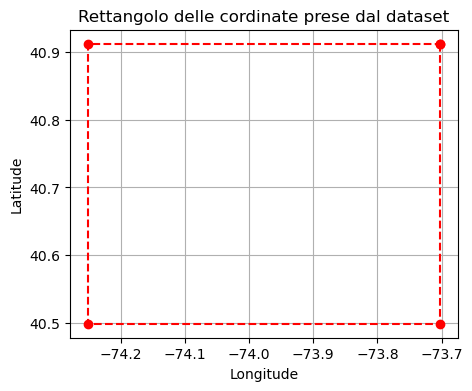

In [25]:
lats = [max_lat, min_lat, min_lat, max_lat, max_lat]
longs = [max_long, max_long, min_long, min_long, max_long]

plt.figure(figsize=(5,4))
plt.plot(longs, lats, marker='o', linestyle='--', color='red')
plt.title("Rettangolo delle cordinate prese dal dataset")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

### - Quante segnalazioni sono state fatte per case private?

In [29]:
# Numero di segnalazioni per case private
df[df["Location Type"] == "Residential Building/House"].shape[0]

146040

In [32]:
# Segnalazioni totali
df["Location Type"].shape[0]

225414

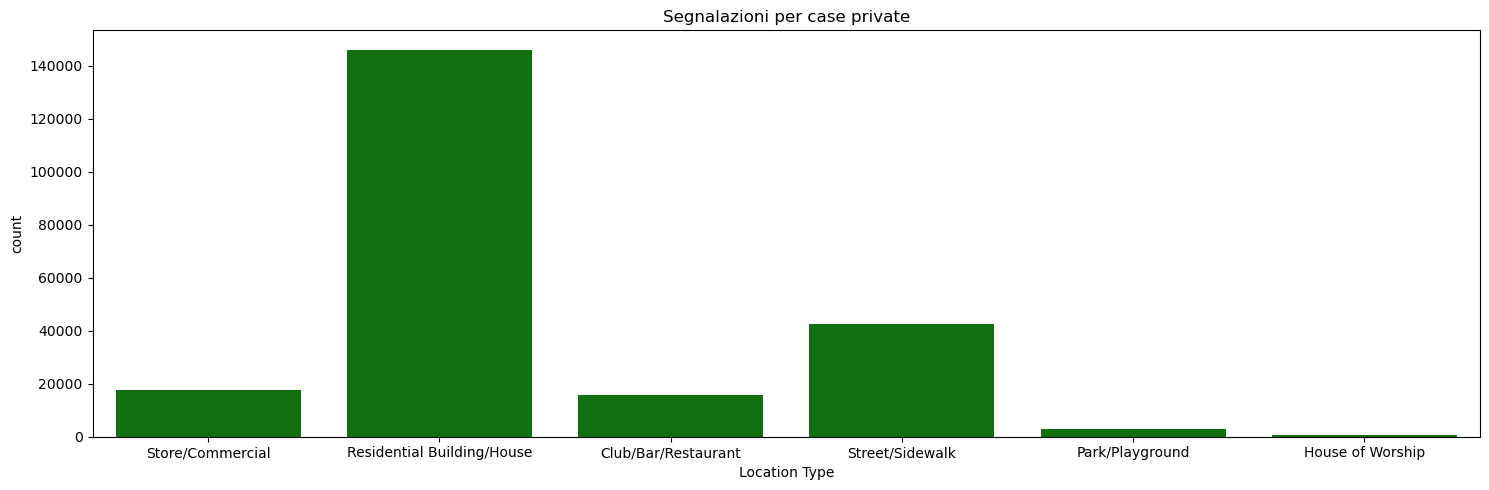

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= "Location Type", color="green")
plt.title("Segnalazioni per case private")
plt.tight_layout()
plt.show()

In [28]:
# come possiamo vedere dal grafico le la stragrande maggioranza di segnalazioni viene dalle case private
# in particolare 146040 segnalazioni su 225414, pari al 64.78 %

### - Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

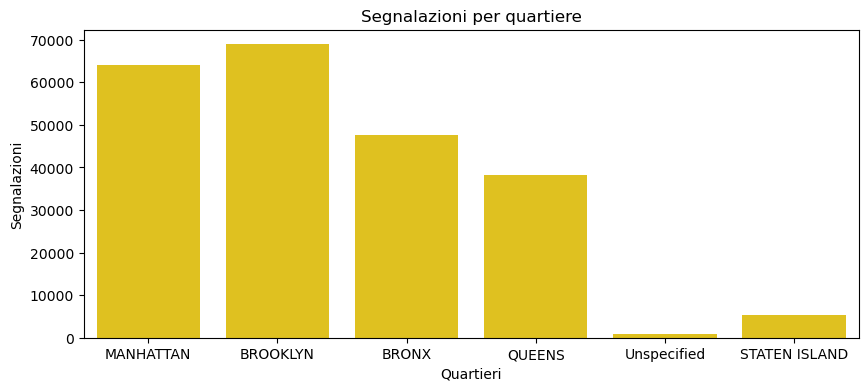

In [47]:
plt.tight_layout()
plt.figure(figsize=(10,4))
plt.title("Segnalazioni per quartiere")
plt.xlabel("Quartieri")
plt.ylabel("Segnalazioni")
sns.countplot(data = df, x="Borough", color="gold")
plt.show

### - che succede se aggiungiamo il parametro hue="Location Type"?

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

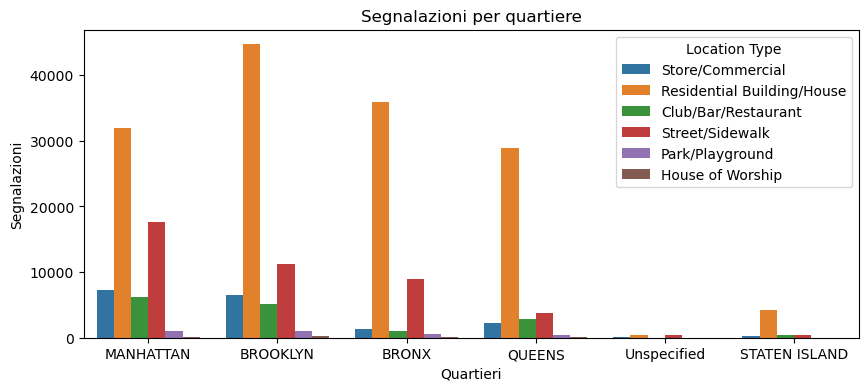

In [45]:
plt.tight_layout()
plt.figure(figsize=(10,4))
plt.title("Segnalazioni per quartiere")
plt.xlabel("Quartieri")
plt.ylabel("Segnalazioni")
sns.countplot(data = df, x="Borough", hue="Location Type")
plt.show

In [48]:
# veramente interessante!!!